In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
election_data = pd.read_csv("/content/election_results_2024.csv")

In [13]:
election_data

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
...,...,...,...,...,...,...,...,...
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared


In [15]:
election_data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [18]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


In [19]:
election_data['Margin'] = election_data['Margin'].str.replace(',', '').replace('-', '0').astype(int)

In [22]:
election_data['Trailing Candidate'].fillna('Unknown', inplace=True)
election_data['Trailing Party'].fillna('Unknown', inplace=True)

In [23]:
print("\nBasic Statistics:\n", election_data.describe(include='all'))



Basic Statistics:
        Constituency  Const. No. Leading Candidate           Leading Party  \
count           543  543.000000               543                     543   
unique          541         NaN               542                      42   
top     Maharajganj         NaN      RAHUL GANDHI  Bharatiya Janata Party   
freq              2         NaN                 2                     240   
mean            NaN   18.178637               NaN                     NaN   
std             NaN   16.427840               NaN                     NaN   
min             NaN    1.000000               NaN                     NaN   
25%             NaN    6.000000               NaN                     NaN   
50%             NaN   14.000000               NaN                     NaN   
75%             NaN   25.000000               NaN                     NaN   
max             NaN   80.000000               NaN                     NaN   

          Trailing Candidate            Trailing Party 

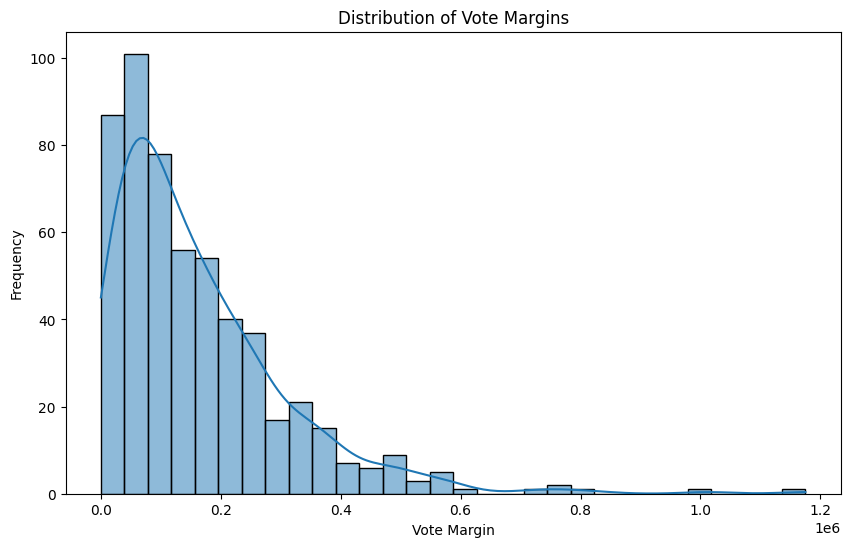

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(election_data['Margin'], bins=30, kde=True)
plt.title('Distribution of Vote Margins')
plt.xlabel('Vote Margin')
plt.ylabel('Frequency')
plt.show()


 1.Party Performance Analysis

In [25]:
#Count the number of leading candidates by party
leading_party_counts = election_data['Leading Party'].value_counts()
print("Number of leading candidates by party:\n", leading_party_counts)


Number of leading candidates by party:
 Leading Party
Bharatiya Janata Party                                      240
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                              

<ipython-input-26-7dbc2e10aebd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leading_party_counts.index, y=leading_party_counts.values, palette='viridis')


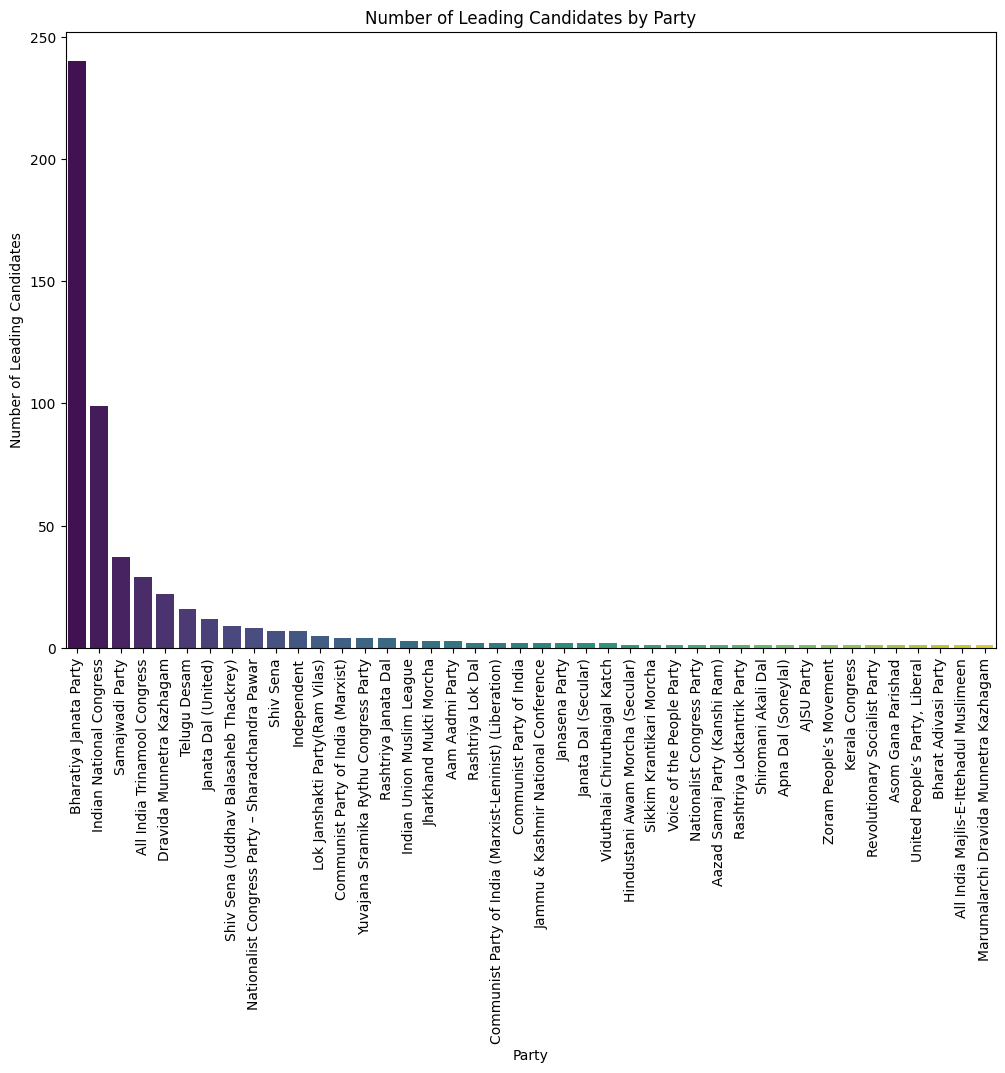

In [26]:
# Visualize the number of leading candidate by party
plt.figure(figsize=(12, 8))
sns.barplot(x=leading_party_counts.index, y=leading_party_counts.values, palette='viridis')
plt.title('Number of Leading Candidates by Party')
plt.xlabel('Party')
plt.ylabel('Number of Leading Candidates')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Calculate overall vote margins for each party
party_margins = election_data.groupby('Leading Party')['Margin'].sum()
print("\nOverall vote margins for each party:\n", party_margins)



Overall vote margins for each party:
 Leading Party
AJSU Party                                                     80880
Aam Aadmi Party                                               227517
Aazad Samaj Party (Kanshi Ram)                                151473
All India Majlis-E-Ittehadul Muslimeen                        338087
All India Trinamool Congress                                 4910963
Apna Dal (Soneylal)                                            37810
Asom Gana Parishad                                            222351
Bharat Adivasi Party                                          247054
Bharatiya Janata Party                                      46081536
Communist Party of India                                      334885
Communist Party of India (Marxist)                            746237
Communist Party of India (Marxist-Leninist) (Liberation)      165666
Dravida Munnetra Kazhagam                                    5081582
Hindustani Awam Morcha (Secular)                  

<ipython-input-28-3ac3f0e0fe5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_margins.index, y=party_margins.values, palette='viridis')


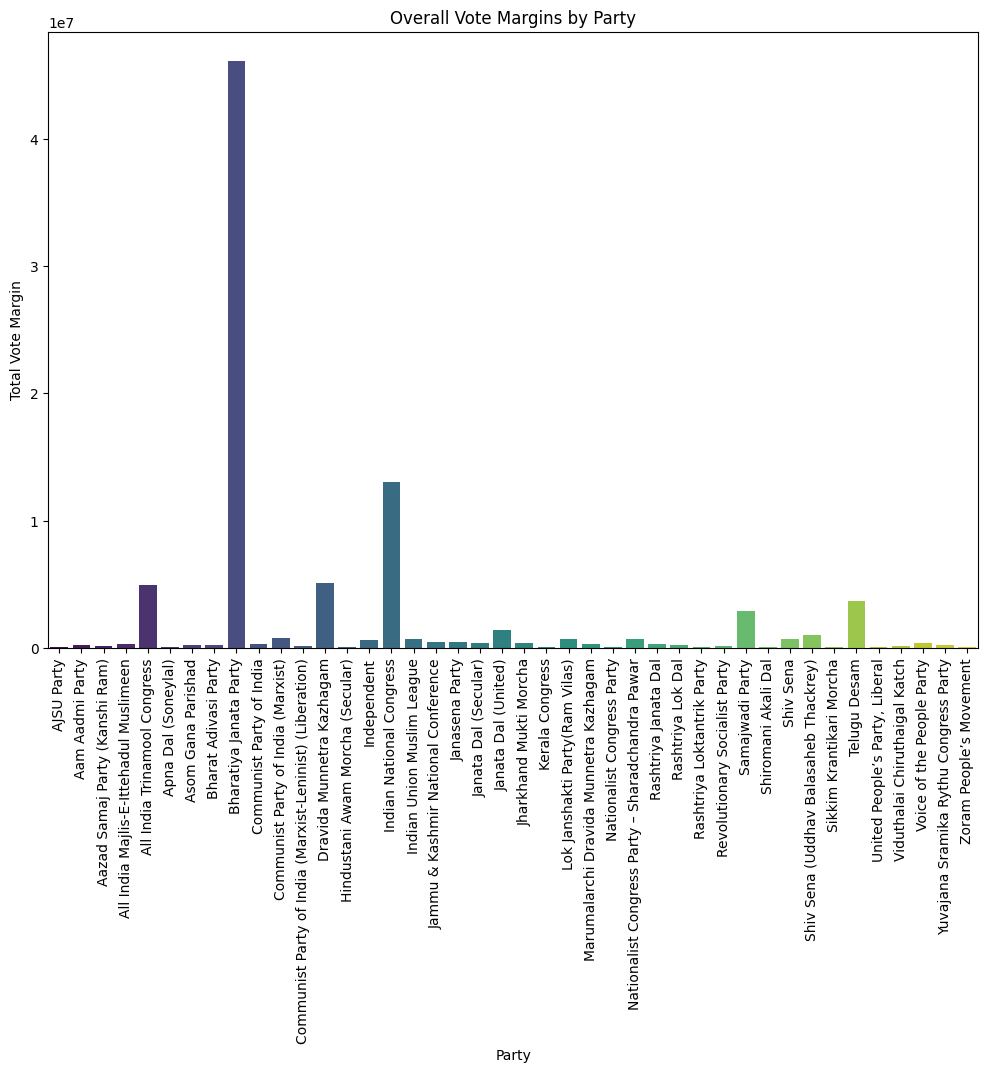

In [28]:
# Visualize the overall vote margins for each party
plt.figure(figsize=(12, 8))
sns.barplot(x=party_margins.index, y=party_margins.values, palette='viridis')
plt.title('Overall Vote Margins by Party')
plt.xlabel('Party')
plt.ylabel('Total Vote Margin')
plt.xticks(rotation=90)
plt.show()

In [29]:
# Identify the most and least competitive constituencies
most_competitive = election_data.nsmallest(5, 'Margin')
least_competitive = election_data.nlargest(5, 'Margin')
print("\nMost competitive constituencies:\n", most_competitive)
print("\nLeast competitive constituencies:\n", least_competitive)


Most competitive constituencies:
           Constituency  Const. No.               Leading Candidate  \
493              Surat          24  MUKESHKUMAR CHANDRAKAANT DALAL   
357  Mumbai North West          27        RAVINDRA DATTARAM WAIKAR   
40            Attingal          19               ADV ADOOR PRAKASH   
236             Jajpur           8         RABINDRA NARAYAN BEHERA   
226       JAIPUR RURAL           6              RAO RAJENDRA SINGH   

                Leading Party     Trailing Candidate  \
493    Bharatiya Janata Party                Unknown   
357                 Shiv Sena  AMOL GAJANAN KIRTIKAR   
40   Indian National Congress                  V JOY   
236    Bharatiya Janata Party        SARMISTHA SETHI   
226    Bharatiya Janata Party            ANIL CHOPRA   

                            Trailing Party  Margin           Status  
493                                Unknown       0      Uncontested  
357  Shiv Sena (Uddhav Balasaheb Thackrey)      48  Result Declared

In [31]:
# Visualize the most and least competitive constituencies
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<ipython-input-32-a1133021b5d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Constituency', y='Margin', data=most_competitive, palette='viridis')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Surat'),
  Text(1, 0, 'Mumbai North West'),
  Text(2, 0, 'Attingal'),
  Text(3, 0, 'Jajpur'),
  Text(4, 0, 'JAIPUR RURAL')])

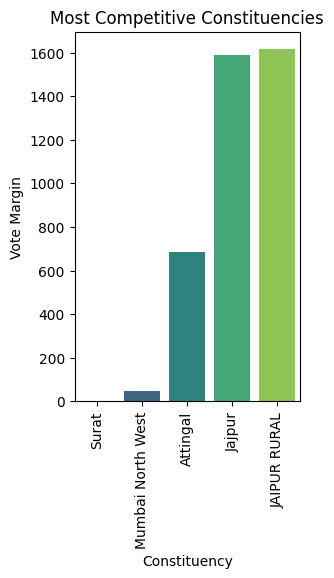

In [32]:
plt.subplot(1, 2, 1)
sns.barplot(x='Constituency', y='Margin', data=most_competitive, palette='viridis')
plt.title('Most Competitive Constituencies')
plt.xlabel('Constituency')
plt.ylabel('Vote Margin')
plt.xticks(rotation=90)

<ipython-input-33-d0bf7885102f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Constituency', y='Margin', data=least_competitive, palette='viridis')


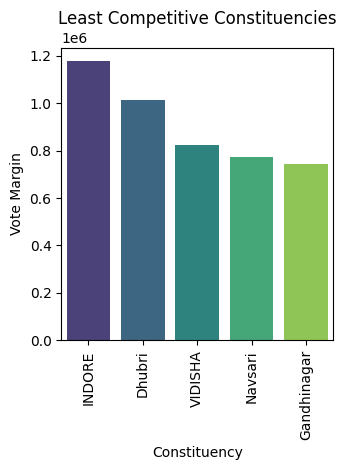

In [33]:
plt.subplot(1, 2, 2)
sns.barplot(x='Constituency', y='Margin', data=least_competitive, palette='viridis')
plt.title('Least Competitive Constituencies')
plt.xlabel('Constituency')
plt.ylabel('Vote Margin')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

3.Candidate Analysis

In [34]:
# Identify the leading candidates with the largest and smallest margins
largest_margins = election_data.nlargest(5, 'Margin')
smallest_margins = election_data.nsmallest(5, 'Margin')
print("\nLeading candidates with the largest margins:\n", largest_margins)
print("\nLeading candidates with the smallest margins:\n", smallest_margins)



Leading candidates with the largest margins:
     Constituency  Const. No.      Leading Candidate             Leading Party  \
221       INDORE          26        SHANKAR LALWANI    Bharatiya Janata Party   
157       Dhubri           2        RAKIBUL HUSSAIN  Indian National Congress   
525      VIDISHA          18  SHIVRAJ SINGH CHOUHAN    Bharatiya Janata Party   
384      Navsari          25              C R PATIL    Bharatiya Janata Party   
186  Gandhinagar           6              AMIT SHAH    Bharatiya Janata Party   

                Trailing Candidate                     Trailing Party  \
221    SANJAY S/O LAKSHMAN SOLANKI                Bahujan Samaj Party   
157       MOHAMMED BADRUDDIN AJMAL  All India United Democratic Front   
525             PRATAPBHANU SHARMA           Indian National Congress   
384  NAISHADHBHAI BHUPATBHAI DESAI           Indian National Congress   
186          SONAL RAMANBHAI PATEL           Indian National Congress   

      Margin           Stat

<ipython-input-35-b8452bdcd7d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Leading Candidate', y='Margin', data=largest_margins, palette='viridis')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'SHANKAR LALWANI'),
  Text(1, 0, 'RAKIBUL HUSSAIN'),
  Text(2, 0, 'SHIVRAJ SINGH CHOUHAN'),
  Text(3, 0, 'C R PATIL'),
  Text(4, 0, 'AMIT SHAH')])

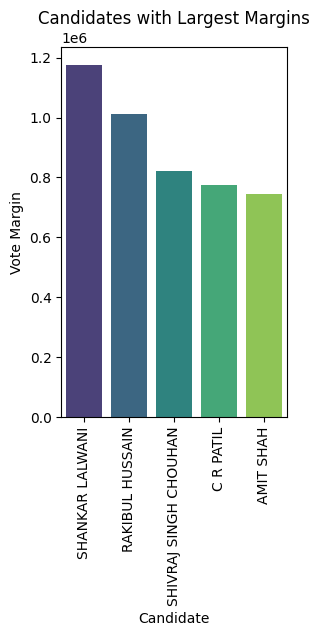

In [35]:
plt.subplot(1, 2, 1)
sns.barplot(x='Leading Candidate', y='Margin', data=largest_margins, palette='viridis')
plt.title('Candidates with Largest Margins')
plt.xlabel('Candidate')
plt.ylabel('Vote Margin')
plt.xticks(rotation=90)


<ipython-input-37-7941f4d627e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Leading Candidate', y='Margin', data=smallest_margins, palette='viridis')


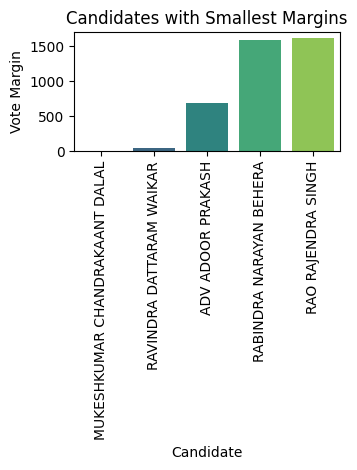

In [37]:
plt.subplot(1, 2, 2)
sns.barplot(x='Leading Candidate', y='Margin', data=smallest_margins, palette='viridis')
plt.title('Candidates with Smallest Margins')
plt.xlabel('Candidate')
plt.ylabel('Vote Margin')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Determine the number of constituencies each leading candidate is winning in
candidate_wins = election_data['Leading Candidate'].value_counts()
print("\nNumber of constituencies each leading candidate is winning in:\n", candidate_wins)

 3. **Regional** **Analysis**


 #Assuming constituency names include some regional information, let's use that Here, we are assuming that the first word in the constituency name can represent the region.

In [38]:
election_data['Region'] = election_data['Constituency'].apply(lambda x: x.split()[0])
regional_distribution = election_data.groupby(['Region', 'Leading Party']).size().unstack(fill_value=0)
print("\nRegional distribution of leading parties:\n", regional_distribution)



Regional distribution of leading parties:
 Leading Party     AJSU Party  Aam Aadmi Party  Aazad Samaj Party (Kanshi Ram)  \
Region                                                                          
AJMER                      0                0                               0   
ALWAR                      0                0                               0   
AMBALA                     0                0                               0   
ANANTNAG-RAJOURI           0                0                               0   
ARAKKONAM                  0                0                               0   
...                      ...              ...                             ...   
Wardha                     0                0                               0   
Wayanad                    0                0                               0   
West                       0                0                               0   
Yavatmal-                  0                0                    

In [53]:
plt.figure(figsize=(14, 10))
sns.heatmap(regional_distribution, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Regional Distribution of Leading Parties')
plt.xlabel('Party')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a4a7e597010> (for post_execute):


KeyboardInterrupt: 